In [0]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [0]:
#Anscombe's Quartet
def anscombe(n=1):
  assert 1 <= n and n <= 4
  X = np.vstack([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
  if n == 1:
    y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
  elif n == 2:
    y = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
  elif n == 2:
    y = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
  elif n == 2:
    X = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
    y = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
  X = np.vstack(X)
  y = np.asarray(y)
  return X, y

X, y = anscombe(2)

In [0]:
C = np.cov(y, X.ravel())
beta1 = C[0, 1]/C[1, 1]
beta0 = y.mean() - beta1*X.mean()

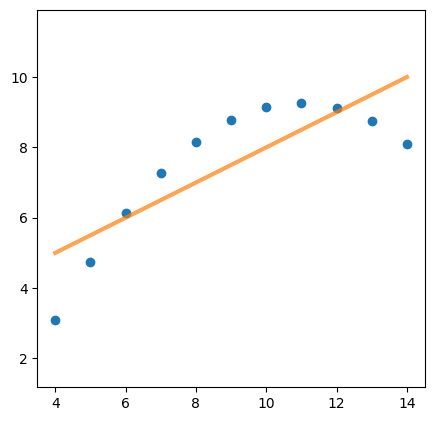

In [0]:
plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(X, y, color='C0')

x_plot = np.linspace(X.min(), X.max(), 10)
plt.plot(x_plot, beta0+x_plot*beta1, color='C1', linewidth=3, alpha=.7)

plt.axis('equal')
plt.show()

In [0]:
print(X.shape)
print(X)

(11, 1)
[[10]
 [ 8]
 [13]
 [ 9]
 [11]
 [14]
 [ 6]
 [ 4]
 [12]
 [ 7]
 [ 5]]


In [0]:
Xprime = np.concatenate([X, X**2], axis=1)
Xprime

array([[ 10, 100],
       [  8,  64],
       [ 13, 169],
       [  9,  81],
       [ 11, 121],
       [ 14, 196],
       [  6,  36],
       [  4,  16],
       [ 12, 144],
       [  7,  49],
       [  5,  25]])

In [0]:
def y_hat(x, theta):
  ret = theta[0] + np.sum([x[:, i]*theta[i+1] for i in range(x.shape[1])], axis=0)
  return ret.ravel()

theta = np.ones(3)
y_hat(X, theta)

array([11.,  9., 14., 10., 12., 15.,  7.,  5., 13.,  8.,  6.])

In [0]:
def squared_loss(y, y_hat):
  return np.sum((y-y_hat)**2)

f = lambda theta: squared_loss(y, y_hat(Xprime, theta))

theta0 = np.random.uniform(-10, 10, size=3)

res = minimize(f, theta0, options={'disp': True})
theta = res.x
print("Started at %s, found minima at %s" % (theta0, theta))

Optimization terminated successfully.
         Current function value: 0.000022
         Iterations: 12
         Function evaluations: 70
         Gradient evaluations: 14
Started at [ 1.09155314  1.6779187  -5.08718266], found minima at [-5.99580176  2.78085635 -0.12671424]


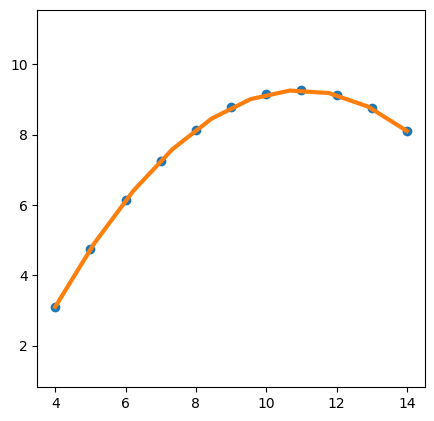

In [0]:
plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(X, y, color='C0')
x_plot = np.vstack(np.linspace(X.min(), X.max(), 10))

plt.plot(x_plot, y_hat(np.concatenate([x_plot, x_plot**2], axis=1), theta), color='C1', linewidth=3)

plt.axis('equal')
plt.show()

A series with order $N$:

$s_{N}(x)={\frac {\theta_{1}}{2}}+\sum _{n=1}^{N}\left(\theta_{2n}\cos \left({\tfrac {2\pi nx}{\theta_0}}\right)+\theta_{2n+1}\sin \left({\tfrac {2\pi nx}{\theta_0}}\right)\right)$

In [0]:
order = 3
period = 1
theta = np.ones(2 + order*2)
theta[0] = period

assert (len(theta) % 2) == 0 and len(theta) >= 2

def fourier_series(x, theta):
  ret = theta[1]/2
  for n in range(1, len(theta)//2):
    ret += theta[n*2]*np.cos(2*np.pi*n*x/theta[0]) + theta[n*2+1]*np.sin(2*np.pi*n*x/theta[0])
  return ret

fourier_series(np.vstack(np.linspace(0, 2, 5)), theta)

array([[ 3.5],
       [-0.5],
       [ 3.5],
       [-0.5],
       [ 3.5]])

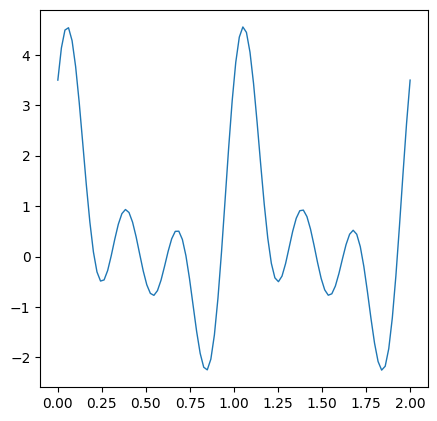

In [0]:
plt.figure(figsize=(5, 5), dpi=100)
X_plot = np.vstack(np.linspace(0, 2, 100))
plt.plot(X_plot, fourier_series(X_plot, theta), color='C0', linewidth=1)
plt.show()

Periodic function

Sawtooth wave: $f(x) = x - \lfloor x \rfloor$

Square wave: $f(x) = f(x) = \left\{\begin{matrix}
1 &, x - \lfloor x \rfloor \geq 0.5\\ 
0 &, x - \lfloor x \rfloor < 0.5
\end{matrix}\right.$

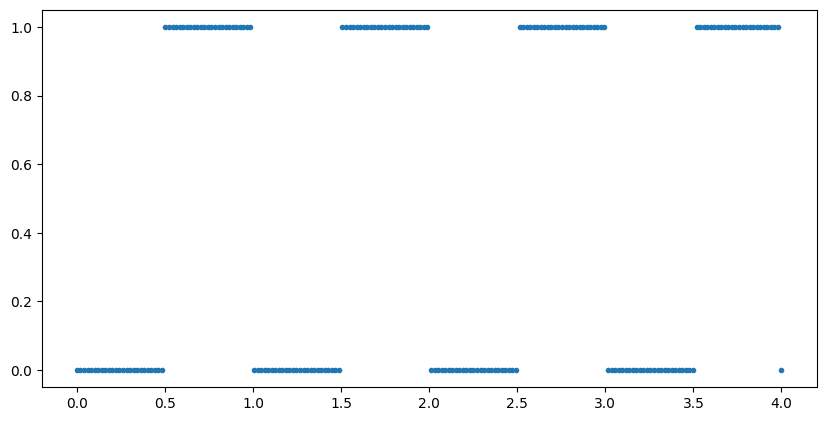

In [0]:
sawtooth = lambda x: x - np.floor(x)
square = lambda x: np.asarray((x - np.floor(x)) >= .5, dtype=np.float)
f = square

X_plot = np.vstack(np.linspace(0, 4, 200))
y = f(X_plot)

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(X_plot.ravel(), y.ravel(), '.', color='C0')
plt.show()

Started at [ 1.         -0.87482362  1.4412233   1.07083595  0.66305258  0.06614416
 -1.40165143 -0.74307012  1.59183699 -1.8382011  -1.33331923  0.31785152
 -0.25489743  1.1238148  -1.11848845 -1.54969088  0.63388407  1.90926464
 -1.83976113 -1.95022692 -1.52975066 -0.96700186], found minima at [ 1.99860117e+00  9.83513492e-01 -1.65345257e-02  1.08481274e-02
 -1.08848003e-02 -6.36756610e-01 -1.63476746e-02 -1.07113591e-02
 -1.64938302e-02  1.42419462e-04 -1.67377959e-02  1.10472960e-02
 -1.08869837e-02 -2.12619339e-01 -1.61760249e-02 -1.06359628e-02
 -1.65194404e-02  2.98463035e-04 -1.69633474e-02  1.13143653e-02
 -1.08877604e-02 -1.28008903e-01]
Objective function value: 1.714


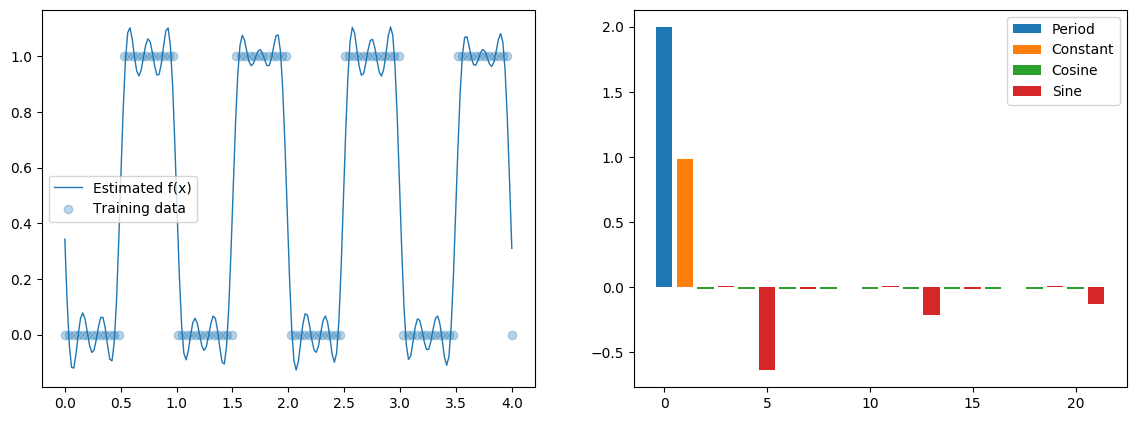

In [0]:
model_order = 10
n_data = 100

X = np.linspace(0, 4, n_data)
y = f(X)

loss = lambda theta: np.sum((y - fourier_series(X, theta))**2)
theta0 = np.random.uniform(-2, 2, size=2+2*model_order)
theta0[0] = 1

#bounds = [(-2, 2)]*len(theta0)
bounds = [(None, None)]*len(theta0)
#bounds[0] = (.9, 1.1)

res = minimize(loss, theta0, bounds=bounds, options={'disp': True})
theta = res.x
print("Started at %s, found minima at %s" % (theta0, theta))
print("Objective function value: %.3f" % res.fun)

fig = plt.figure(figsize=(14, 5), dpi=100)
ax = fig.subplots(1, 2)

ax[0].scatter(X, y, color='C0', alpha=.3, label="Training data")
X_plot = np.vstack(np.linspace(X.min(), X.max(), 200))
ax[0].plot(X_plot, fourier_series(X_plot, theta), color='C0', linewidth=1, label="Estimated f(x)")
ax[0].legend()

b = list(range(len(theta)))
ax[1].bar(b[0], theta[0], width=.8, color='C0', label="Period")
ax[1].bar(b[1], theta[1], width=.8, color='C1', label="Constant")
ax[1].bar(b[2], theta[2], width=.8, color='C2', label="Cosine")
ax[1].bar(b[3], theta[3], width=.8, color='C3', label="Sine")
for i in range(4, len(theta0)):
  if (i % 2) == 0:
    c = 'C2'
  else:
    c = 'C3'
  ax[1].bar(b[i], theta[i], width=.8, color=c)
ax[1].legend()

fig.show()

Started at [4.         0.29093496 0.78479381 0.10105495 0.71995783 0.71736814
 0.26202635 0.50317962 0.66436393 0.38813514 0.63751555 0.21022927
 0.82162124 0.25953044 0.17216804 0.88284409 0.82429174 0.11106781
 0.17362864 0.41552629 0.30059007 0.23768098 0.91596399 0.31623708
 0.44629247 0.32701643 0.11129443 0.15425252 0.58356491 0.11314481
 0.34579136 0.76832491], found minima at [  5.11617342  65.42056202  43.99167501 -45.52968137   1.21269209
 -60.52077968 -37.26200455 -40.68900385 -48.19815045  -3.06017131
 -30.82321369  26.59241594  -3.12282094  32.52847146  15.78531266
  19.6106166   18.34837567   2.17007113  10.15765914  -7.86814866
   1.19106164  -8.21556618  -3.11872481  -4.09505584  -2.83634862
  -0.39857376  -1.13466908   0.8507406   -0.08151984   0.59326117
   0.18548253   0.20835177]
Objective function value: 1.010


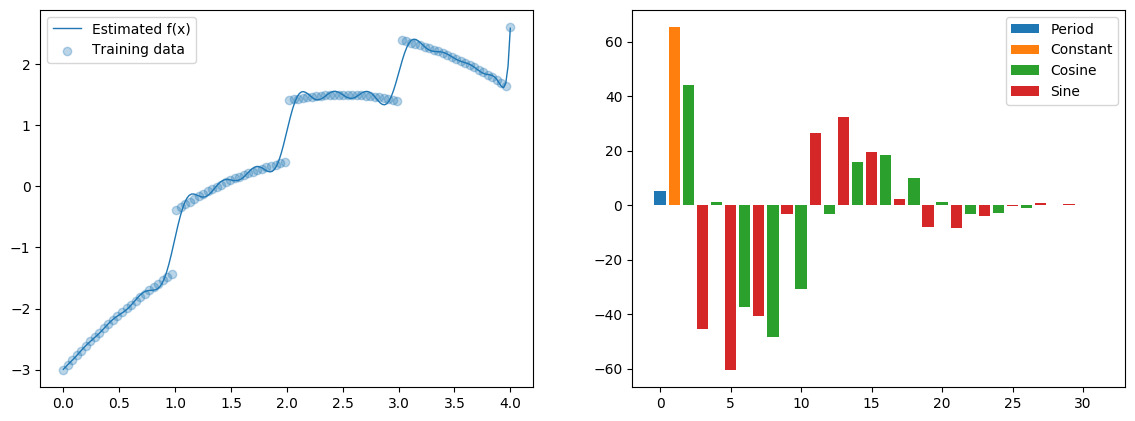

In [0]:
model_order = 15
n_data = 100

f = lambda x: -.4*x**2 + 2*x -3 + np.floor(x)

X = np.linspace(0, 4, n_data)
y = f(X)

loss = lambda theta: np.sum((y - fourier_series(X, theta))**2)
theta0 = np.random.uniform(0.1, 1, size=2+2*model_order)

theta0[0] = X.max() - X.min()

#bounds = [(-2, 2)]*len(theta0)
bounds = [(None, None)]*len(theta0)
bounds[0] = (2, 10)

res = minimize(loss, theta0, bounds=bounds, options={'disp': True})
theta = res.x
print("Started at %s, found minima at %s" % (theta0, theta))
print("Objective function value: %.3f" % res.fun)

fig = plt.figure(figsize=(14, 5), dpi=100)
ax = fig.subplots(1, 2)
ax[0].scatter(X, y, color='C0', alpha=.3, label="Training data")
X_plot = np.vstack(np.linspace(X.min(), X.max(), 200))
ax[0].plot(X_plot, fourier_series(X_plot, theta), color='C0', linewidth=1, label="Estimated f(x)")
ax[0].legend()

b = list(range(len(theta)))
ax[1].bar(b[0], theta[0], width=.8, color='C0', label="Period")
ax[1].bar(b[1], theta[1], width=.8, color='C1', label="Constant")
ax[1].bar(b[2], theta[2], width=.8, color='C2', label="Cosine")
ax[1].bar(b[3], theta[3], width=.8, color='C3', label="Sine")
for i in range(4, len(theta0)):
  if (i % 2) == 0:
    c = 'C2'
  else:
    c = 'C3'
  ax[1].bar(b[i], theta[i], width=.8, color=c)
#pos = np.arange((len(theta)-2)//2)*2+2
#l = tuple(["%i" % i for i in range(1, len(pos)+1)])
#assert len(pos)==len(l)
#ax[1].set_xticks(pos, l)
#ax[1].set_xlabel("[Hz]")
ax[1].legend()
fig.show()